In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as t
import numpy as np

In [13]:
IID_to_income_helper = {}
IID_to_income = {}
IID_to_income_lic = {}
IID_to_employee_num = {}
IID_to_taxes = {}
IID_to_salary = {}
total = {}

column1 = 'income'
column2 = 'income_lic'
column3 = 'employee_num'
column4 = 'taxes'
column5 = 'salary'
df = pd.read_csv('fns_for_model.csv', delimiter=';')
    
df[column4] = df["taxesProfit"] + df["taxesVAT"] + df["taxesEmplSal"]
df[column5] = df['fot'] / df[column3]

In [14]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [15]:
def one_quarter(column, year, quarter):
    
    df_income = df[(df['year'] == year) & (df['quarter'] == quarter)]
    income_sum = df_income[column].sum()

    df2 = df_income.sort_values(by=column, ascending=False)
    
    IID_to_income_helper = dict(zip(df2['IID'], df2[column]))
    for key in IID_to_income_helper:
        if column == column1:
            IID_to_income[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column2:
            IID_to_income_lic[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column3:
            IID_to_employee_num[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column4:
            IID_to_taxes[(key, year, quarter)] = IID_to_income_helper[key]    
        if column == column5:
            IID_to_salary[(key, year, quarter)] = IID_to_income_helper[key]
        

In [16]:
year = 2021
quarter = 3
one_quarter(column=column1, year=year, quarter=quarter)
one_quarter(column=column2, year=year, quarter=quarter)
one_quarter(column=column3, year=year, quarter=quarter)
one_quarter(column=column4, year=year, quarter=quarter)
one_quarter(column=column5, year=year, quarter=quarter)

In [17]:
def result(IID_to):
    sum = 0
    for key in IID_to.keys():
        for i in range(2019, 2022):
            for j in range(1, 5):
                if (key[0], i, j) in IID_to:
                    sum += IID_to[(key[0], i, j)]
                    total[key[0]] = sum
        sum = 0
    dict(sorted(total.items(), key=lambda item: item[1]))
    df = pd.DataFrame(list(total.items()))
    income_sum = df[1].sum()
    i = 1
    while (df[1][0:i].sum() <= 0.2 * income_sum):
        i += 1
    print("20% count - " + str(i) + " : " + str(df[1][0:i].sum()) + " / " + str(income_sum))

    i1 = 1
    while (df[1][0:i1].sum() <= 0.8 * income_sum):
        i1 += 1
    print("80% count - " + str(i1) + " : " + str(df[1][0:i1].sum()) + " / " + str(income_sum))

    i2 = i1 + 1
    while (df[1][i1:i2].sum() <= 0.15 * income_sum):
        i2 += 1
    print("15% count - " + str(i2-i1) + " : " + str(df[1][i1:i2].sum()) + " / " + str(income_sum))

    print("5% count - " + str(df[1].size - i2))
    
    return df

In [18]:
# income
df_income = result(IID_to_income)

20% count - 17 : 688675101949.0 / 3365269532443.0
80% count - 764 : 2692481249637.0 / 3365269532443.0
15% count - 1565 : 504849621994.0 / 3365269532443.0
5% count - 34495


In [19]:
# income_lic
df_income_lic = result(IID_to_income_lic)

20% count - 21 : 25401132822.5 / 121225715853.0
80% count - 729 : 97405382938.0 / 121225715853.0
15% count - 2599 : 18204264621.0 / 121225715853.0
5% count - 33496


In [20]:
# taxes
df_taxes = result(IID_to_taxes)

20% count - 26 : 82423586613 / 408313540498
80% count - 1839 : 326672407625 / 408313540498
15% count - 25426 : 61247406970 / 408313540498
5% count - 9559


In [21]:
# employee_num
df_employee_num = result(IID_to_employee_num)

20% count - 75 : 312694.0833333333 / 1560697.708333333
80% count - 20827 : 1248572.3749999998 / 1560697.708333333
15% count - 11825 : 234157.99999999997 / 1560697.708333333
5% count - 4172


In [22]:
# taxes and income
AA = AB = AC = BA = BB = BC = CA = CB = CC = 0
income_sum = df_income[1].sum()
taxes_sum = df_taxes[1].sum()


i1 = 0
while (df_income[1][0:i1].sum() <= 0.8 * income_sum):
    i1 += 1
j1 = 0
while(df_taxes[1][0:j1].sum() <= 0.8 * taxes_sum):
    j1 += 1

j2 = j1 + 1
while(df_taxes[1][j1:j2].sum() <= 0.15 * taxes_sum):
    j2 += 1
        
AA = len(list(set(df_income[0][0:i1]).intersection(df_taxes[0][0:j1])))
AB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][0:i1])))
AC = df_income[0][0:i1].size - AA - AB


i2 = i1 + 1
while (df_income[1][i1:i2].sum() <= 0.15 * income_sum):
    i2 += 1

BA = len(list(set(df_income[0][i1:i2]).intersection(df_taxes[0][0:j1])))
BB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][i1:i2])))
BC = df_income[0][i1:i2].size - BA - BB

i3 = i2 + 1
while (df_income[1][i3 - 1] != 0):
    i3 += 1
C = df_income[0][0:i3].size
end = df_income[0].size
CA = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][0:j1])))
CB = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][j1:j2])))
CC = df_income[0][i2:end].size - CA - CB

In [23]:
df_print = pd.DataFrame([[AA, AB, AC], [BA, BB, BC], [CA, CB, CC]], index=['A', 'B', 'C'], columns=['A', 'B', 'C'])
df_print

,A,B,C
A,764,0,0
B,1075,490,0
C,0,24936,9559


In [24]:
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)

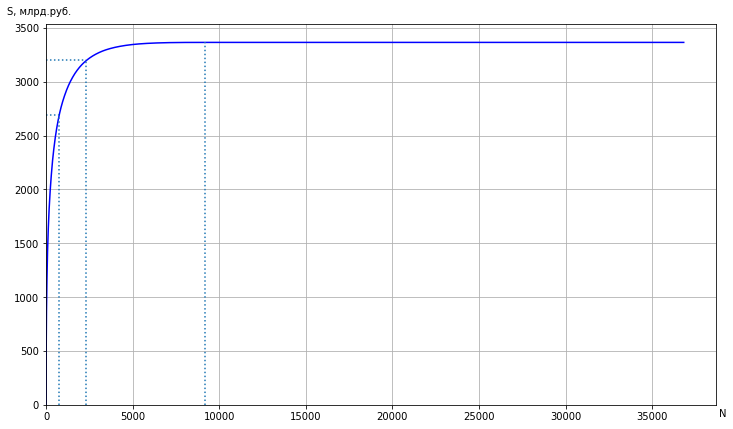

In [25]:
x = [i for i in range(0, df_income[0].size + 1)]
y = []
sum = 0
for i in range(df_income[1].size + 1):
    if i != 0:
        sum += df_income[1][i - 1] / 1e9
    y.append(sum)
figure = plt.figure(figsize=[12, 7])
ax = figure.add_subplot()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(-0.01, 1.02)
ax.xaxis.set_label_coords(1.01, -0.01)
ax.ticklabel_format(useOffset=False, style='plain')
plt.plot(x, y, color='blue')
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue', linestyles=':')
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue', linestyles=':')
plt.vlines(x = C, ymin= 0, ymax = y[C], color='tab:blue', linestyles=':')
plt.hlines(xmin = 0, xmax = A, y = y[A], color='tab:blue', linestyles=':')
plt.hlines(xmin = 0, xmax = B, y = y[B], color='tab:blue', linestyles=':')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.eps', format='eps')

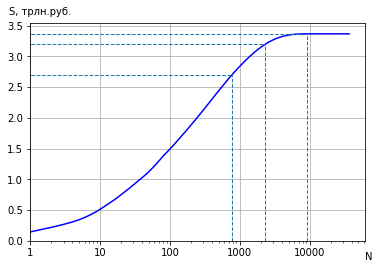

In [26]:
x = [i for i in range(1, df_income[0].size + 1)]
y = []
sum = 0
for i in range(1, df_income[1].size + 1):
    sum += df_income[1][i - 1] / 1e12
    y.append(sum)
    
figure, ax = plt.subplots()
ax.set_ylabel('S, трлн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.05)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue', linestyles='--', linewidth=1)
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue', linestyles='--', linewidth=1)
plt.vlines(x = C, ymin= 0, ymax = y[C], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A, y = y[A], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B, y = y[B], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C, y = y[C], color='tab:blue', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=1)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log.eps', format='eps')